In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 1: Data Cleaning and Preprocessing
data = pd.read_csv('/content/Transactions.csv')

In [13]:
# Display the first few rows of the dataframe
print(data.head())

                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  


In [18]:
# Convert Date to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

In [19]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Handle missing values (e.g., filling or dropping)
data = data.dropna()

# Convert Amount to numeric if necessary
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Ensure Income/Expense is categorized correctly
data['Income/Expense'] = data['Income/Expense'].map({'Income': 1, 'Expense': 0})

# Create relevant features
customer_data = data.groupby('Note').agg({
    'Amount': 'sum',
    'Date': ['count', 'max']
}).reset_index()

customer_data.columns = ['CustomerID', 'TotalSpent', 'PurchaseFrequency', 'LastPurchaseDate']
customer_data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['LastPurchaseDate'])).dt.days

# Display the cleaned and preprocessed data
print(customer_data.head())


                                 CustomerID  TotalSpent  PurchaseFrequency  \
0                               mutual fund      8000.0                  8   
1                                     1 Jar        25.0                  1   
2  1 Year Plan (40mbps + UL+ 3 Months Free)      5640.0                  1   
3                        1 chicken shawarma        60.0                  1   
4                                   1 dozen        72.0                  1   

  LastPurchaseDate  Recency  
0       2015-11-10     3158  
1       2016-06-01     2954  
2       2017-10-09     2459  
3       2017-04-03     2648  
4       2016-09-07     2856  


<ipython-input-19-29d0254552e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
<ipython-input-19-29d0254552e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income/Expense'] = data['Income/Expense'].map({'Income': 1, 'Expense': 0})


In [20]:
# Handle missing values
data = data.dropna()

         TotalSpent  PurchaseFrequency     LastPurchaseDate      Recency
count    384.000000         384.000000                  384   384.000000
mean     689.294219           1.643229  2017-05-27 18:52:30  2593.213542
min        3.000000           1.000000  2015-03-01 00:00:00  2114.000000
25%       40.000000           1.000000  2017-01-03 00:00:00  2340.000000
50%       99.500000           1.000000  2017-06-05 00:00:00  2585.000000
75%      326.250000           1.000000  2018-02-05 00:00:00  2738.000000
max    43000.000000          30.000000  2018-09-19 00:00:00  3412.000000
std     2829.353598           2.228537                  NaN   318.195961


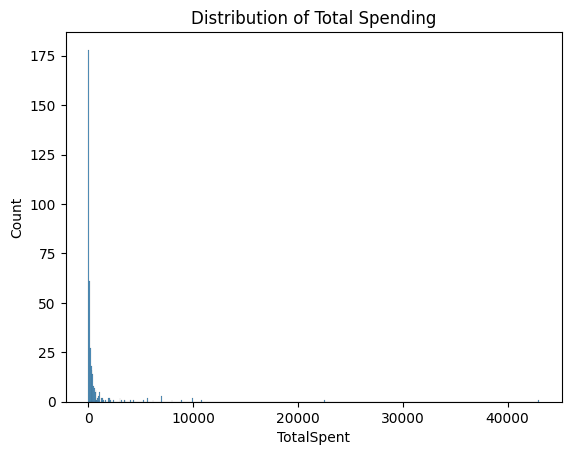

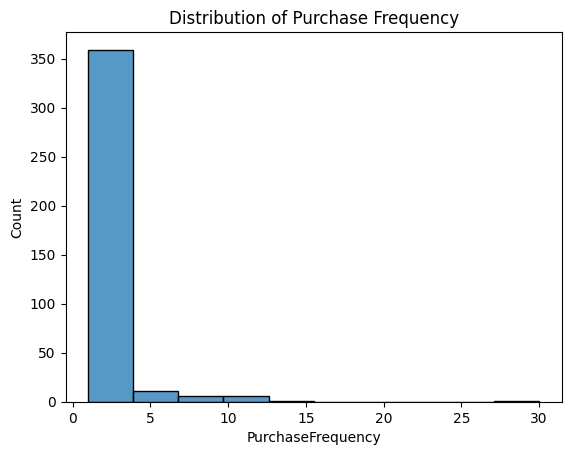

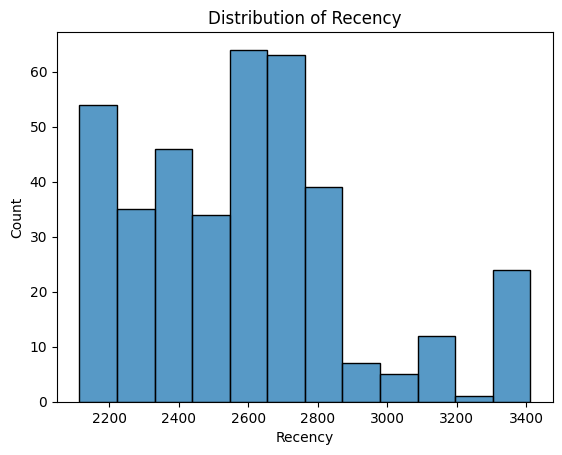

In [21]:
# Descriptive statistics
print(customer_data.describe())

# Visualizations
sns.histplot(customer_data['TotalSpent'])
plt.title('Distribution of Total Spending')
plt.show()

sns.histplot(customer_data['PurchaseFrequency'])
plt.title('Distribution of Purchase Frequency')
plt.show()

sns.histplot(customer_data['Recency'])
plt.title('Distribution of Recency')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

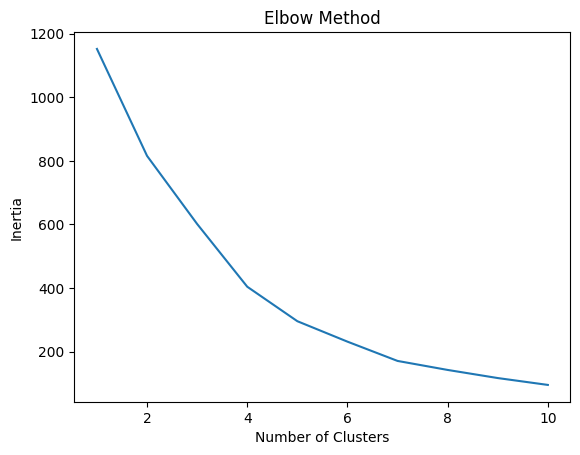

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


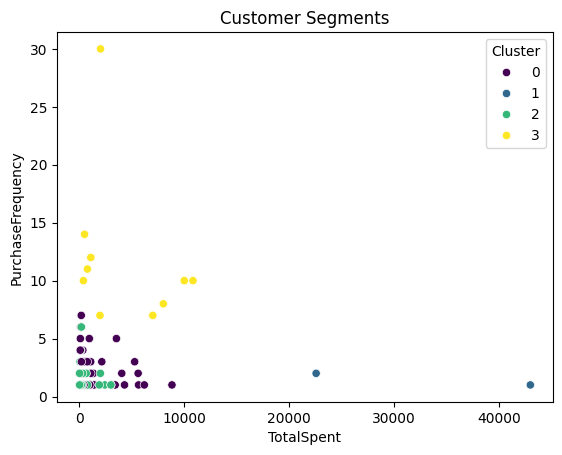

     TotalSpent  PurchaseFrequency      Recency
0    529.774857           1.520000  2339.091429
1  32786.000000           1.500000  2656.500000
2    205.579278           1.128866  2819.829897
3   5117.230769          11.000000  2622.538462


In [22]:
# Normalize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalSpent', 'PurchaseFrequency', 'Recency']])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-means with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualize the clusters
sns.scatterplot(x='TotalSpent', y='PurchaseFrequency', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments')
plt.show()

# Profile the Segments
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=['TotalSpent', 'PurchaseFrequency', 'Recency'])
print(cluster_profiles)


In [25]:
# Save the segmented data to a new CSV file
customer_data.to_csv('/content/segmented_customers.csv', index=False)
